In [3]:
# import json
# from yahoofinancials imp\`ort YahooFinancials as YF
import time
# import datetime
import pandas as pd
# from pandas_datareader import data
from pandas_datareader import data as pdr

# import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)

# from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
import scipy.stats as sp
# from utils import *
import matplotlib.pyplot as plt
# import math

%matplotlib inline

In [33]:
!pip install requests-cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 17.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 18.6 kB/s eta 0:00:00a 0:00:01


In [4]:
# gets stock ticket data for current day going back days_back
def getStocksData(ticker, start='2023-01-01', end='2023-09-01', save_new=False, saveToCSV=True):
    def convert_time(epoch):
        return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch))

    epoch_time = int(time.time())
    day_epoch = 60*60*24
    # check if data exists, if not pull data
    print("in get stocks data")
    print(save_new)
    stock_data =  pdr.get_data_yahoo(ticker, start=start,end=end)
    stock_data = stock_data.reset_index()
    
    try:
        stock_data =  pdr.get_data_yahoo(ticker, start=start,end=end)
        # stock_data = stock_data.reset_index()
        # if (self.debug):
        #     print(f"Downloaded bars of {ticker}")
        #     print(stock_data)
        if saveToCSV:
            path = "/Users/lucasmoyer/development/two-dolla/datasets/stock_csvs"
            stock_data.to_csv(f'{path + "/" + self.ticker}.csv', index = False, encoding='utf-8') 
        self.savedBars[self.ticker] = stock_data
        with open(self.path, 'wb') as handle:
            pickle.dump(self.savedBars, handle,
                        protocol=pickle.HIGHEST_PROTOCOL)
        return stock_data
    except:
        print("Skipping stock for {}, bad data :<".format(ticker))

In [35]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime
import requests_cache

expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

def getStocksData(ticker, start='2023-01-01', end='2023-09-01', save_new=False, saveToCSV=True):
    stock_data = pdr.get_data_yahoo(ticker, start=start,end=end,session=session)
    savedData[ticker] = stock_data # saved the stock data to our python dictionary
    return stock_data

data = getStocksData('T')

[*********************100%***********************]  1 of 1 completed


In [38]:
data = getStocksData('AAPL')

[*********************100%***********************]  1 of 1 completed


In [40]:
data.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325081   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899521   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426559   
...                ...         ...         ...         ...         ...   
2023-08-25  177.380005  179.149994  175.820007  178.610001  178.375000   
2023-08-28  180.089996  180.589996  178.550003  180.190002  179.952927   
2023-08-29  179.699997  184.899994  179.500000  184.119995  183.877747   
2023-08-30  184.940002  187.850006  184.740005  187.649994  187.403107   
2023-08-31  187.839996  189.119995  187.479996  187.869995  187.622818   

       

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560371,42149200
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800
2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800
2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300
2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100
...,...,...,...,...,...,...
2023-11-06,15.830000,15.900000,15.640000,15.750000,15.750000,32805500
2023-11-07,15.710000,15.960000,15.710000,15.840000,15.840000,26425500
2023-11-08,15.840000,15.840000,15.580000,15.650000,15.650000,28224500


In [28]:

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

def getStocksData(ticker, start='1/1/2023', end='9/1/2023', save_new=False, saveToCSV=True):
    path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)

    if (save_new or ticker not in savedData):
        stock_data = pdr.get_data_yahoo(ticker, start=start,end=end)
        savedData[ticker] = stock_data # saved the stock data to our python dictionary
        with open(path, 'wb') as handle:
                    pickle.dump(savedData, handle,
                                protocol=pickle.HIGHEST_PROTOCOL)
    else:
        return savedData[ticker]
    return stock_data

data = getStocksData('T', start='2023-01-01', end='2023-09-01', save_new=False)

In [52]:
df = loadData('T')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300642,36050300
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100


In [31]:
def loadData(ticker,path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"):
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)
    return savedData[ticker]
    
        
loadData('T')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560371,42149200
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800
2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800
2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300
2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100
...,...,...,...,...,...,...
2023-11-06,15.830000,15.900000,15.640000,15.750000,15.750000,32805500
2023-11-07,15.710000,15.960000,15.710000,15.840000,15.840000,26425500
2023-11-08,15.840000,15.840000,15.580000,15.650000,15.650000,28224500


In [34]:

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


from pandas_datareader.yahoo.headers import DEFAULT_HEADERS

import datetime

import requests_cache

expire_after = datetime.timedelta(days=3)

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

session.headers = DEFAULT_HEADERS

def getStocksData(ticker, start='1/1/2023', end='9/1/2023', save_new=False, saveToCSV=True):
    path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)

    if (save_new or ticker not in savedData):
        stock_data = pdr.get_data_yahoo(ticker, start=start,end=end, session=session)
        savedData[ticker] = stock_data # saved the stock data to our python dictionary
        with open(path, 'wb') as handle:
                    pickle.dump(savedData, handle,
                                protocol=pickle.HIGHEST_PROTOCOL)
    else:
        return savedData[ticker]
    return stock_data

data = getStocksData('T', start='2023-01-01', end='2023-09-01', save_new=False)

In [42]:
df = data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800
...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.375000,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,179.952927,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,183.877747,53003900


In [60]:
short = 12
long = 26
df['exp_short']= df['Adj Close'].ewm(span=short, adjust=False).mean()
df['exp_long'] = df['Adj Close'].ewm(span=long, adjust=False).mean()
df['macd'] = df['exp_short']  - df['exp_long'] 
df['macd_norm'] = (df['macd'] - df['macd'].min()) * 2 / (df['macd'].max() - df['macd'].min()) -1 
df.describe()

,Open,High,Low,Close,Adj Close,Volume,macd,macd_norm,exp_short,exp_long
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000
mean,17.171018,17.330060,17.012096,17.164731,16.500746,3.918153e+07,-0.142906,-0.040712,16.613497,16.756403
std,2.042203,2.074679,2.028401,2.055982,1.802398,2.147252e+07,0.260041,0.519227,1.690501,1.542741
min,13.530000,13.990000,13.430000,13.450000,13.197869,1.842420e+07,-0.623341,-1.000000,13.902061,14.055883
25%,15.460000,15.630000,15.235000,15.420000,14.943756,2.827060e+07,-0.303581,-0.361532,15.221919,15.404452
50%,17.150000,17.250000,17.030001,17.120001,16.504797,3.289240e+07,-0.180863,-0.116501,17.172710,17.560369
75%,19.065001,19.270000,18.974999,19.145000,18.146646,4.072900e+07,0.025346,0.295239,18.165871,18.103848
max,20.469999,21.530001,20.070000,20.420000,19.410923,1.609334e+08,0.378308,1.000000,18.885986,18.543054


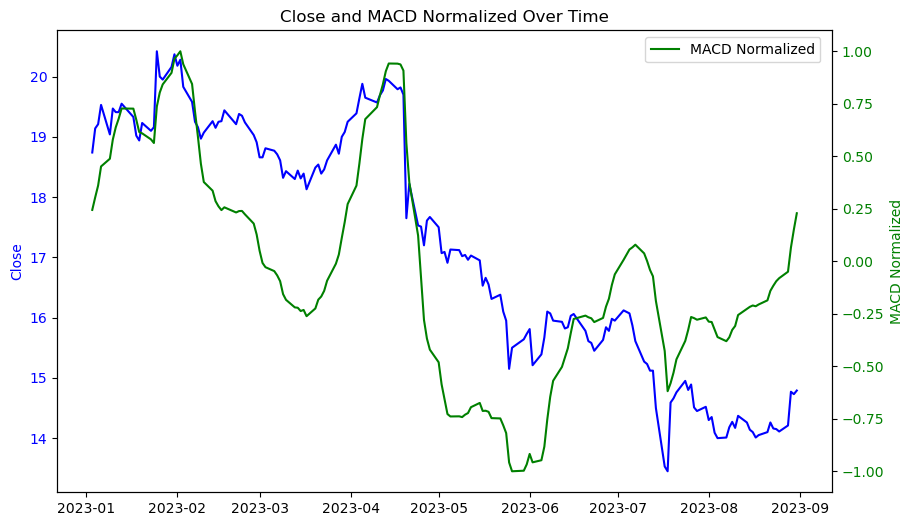

In [59]:
plt.figure(figsize=(10, 6))

# Plotting Close on the first y-axis
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.ylabel('Close', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for macd_norm
ax2 = plt.twinx()
ax2.plot(df['Date'], df['macd_norm'], label='MACD Normalized', color='green')
ax2.set_ylabel('MACD Normalized', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting labels and title
plt.title('Close and MACD Normalized Over Time')
plt.xlabel('Date')

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.show()

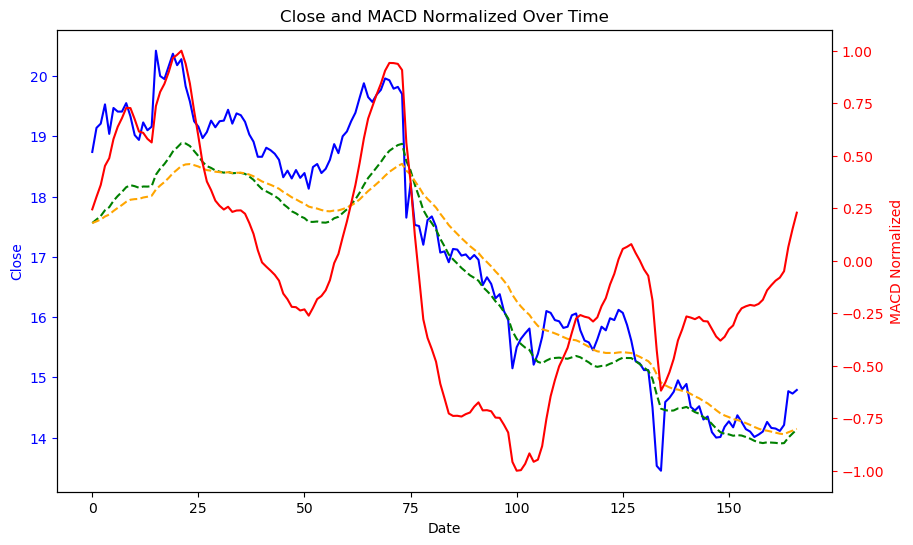

In [62]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Close on the first y-axis
ax1.plot(df.index, df['Close'], color='b', label='Close')
ax1.plot(df.index, df['exp_short'], color='g', linestyle='--', label='Exp Short')
ax1.plot(df.index, df['exp_long'], color='orange', linestyle='--', label='Exp Long')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['macd_norm'], color='r', label='MACD Normalized')
ax2.set_ylabel('MACD Normalized', color='r')
ax2.tick_params('y', colors='r')

plt.title('Close and MACD Normalized Over Time')
plt.show()

In [10]:

import math

def repeatedString(s, n):
    # Write your code here
    index = 0
    result = 0
    while index < n:
        if (index >= len(s)):
            exten_idx = index % len(s)
            if (s[exten_idx] == 'a'):
                result = result + 1
            index = index + 1
        else:
            if (s[index] == 'a'):
                result = result + 1
            index = index + 1
    return result

s = "aba"
n = 10


res = repeatedString(s,n)
res

7